<center><h1 style="color:green;"><strong>Elastic Net Regression (L1 + L2)</strong></h1> </center>

Elastic Net adds both the L1 and L2 penalties to the loss function.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [4]:
X,y = load_diabetes(return_X_y=True)

Train test split our data

In [5]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

Scale the features

In [6]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Train elastic net model

In [7]:
model = ElasticNet(alpha=0.1,l1_ratio=0.5)

model.fit(x_train,y_train)

y_pred = model.predict(x_test)

print("r2 socre: ",r2_score(y_test,y_pred))

r2 socre:  0.4589695819678379


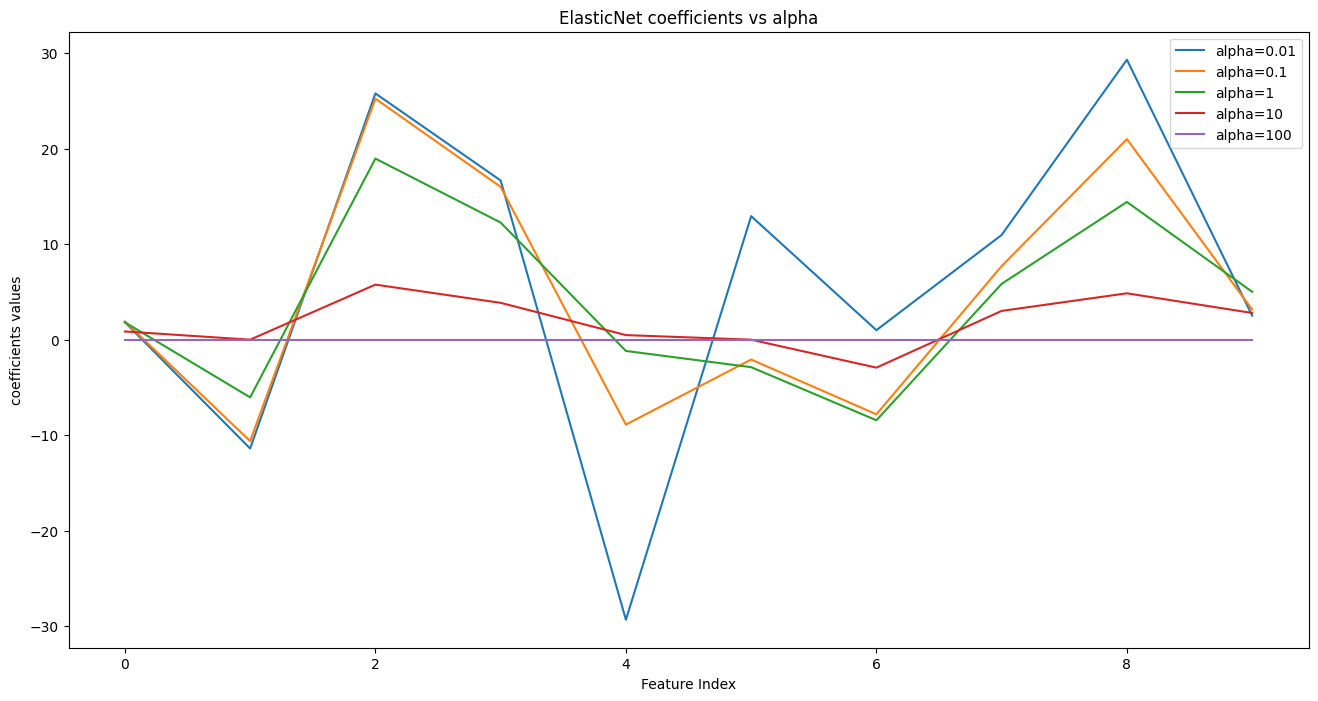

In [8]:

alphas = [0.01, 0.1, 1, 10, 100]
coef = []
for i in alphas:
    model = ElasticNet(alpha=i,l1_ratio=0.5)
    model.fit(x_train,y_train)
    coef.append(model.coef_)

plt.figure(figsize=(16,8))

for i in range(len(coef)):
    plt.plot(coef[i],label=f'alpha={alphas[i]}')

plt.legend()
plt.title("ElasticNet coefficients vs alpha")
plt.xlabel("Feature Index")
plt.ylabel("coefficients values")
plt.show()